# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo SINASC_RO_2019.csv` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo `estrutura_sinasc_para_CD.pdf` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
`
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis `['ESTCIVMAE', 'CONSULTAS']` possuem o código `9`, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código `9`.<br>
6. Substitua os valores faltantes da quantitativa (`QTDFILVIVO`) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção `inplace = True`.

In [154]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# 1) seu código aqui
sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)
sinasc.drop_duplicates().shape
# Não há duplicados

(27028, 69)


(27028, 69)

In [155]:
# 2) seu código aqui
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [156]:
# 3) seu código aqui - mantendo somente as colunas necessárias 

sinasc = sinasc[['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']]

df = pd.DataFrame(sinasc)

df.head()

,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,GESTACAO,GRAVIDEZ,CONSULTAS,APGAR5
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0


In [157]:
# refazendo os missing

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LOCNASC     27028 non-null  int64  
 1   IDADEMAE    27028 non-null  int64  
 2   ESTCIVMAE   26711 non-null  float64
 3   ESCMAE      26716 non-null  object 
 4   QTDFILVIVO  25455 non-null  float64
 5   GESTACAO    25796 non-null  object 
 6   GRAVIDEZ    26949 non-null  object 
 7   CONSULTAS   27028 non-null  int64  
 8   APGAR5      26925 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 1.9+ MB
None


In [158]:
# tirando as linhas sem informação de APGAR5

print(df['APGAR5'].value_counts().sum())

df.dropna(subset=['APGAR5'], inplace=True)

df['APGAR5'].count()



26925


26925

In [159]:
# 4) seu código aqui - substituindo os não preenchidos em ['ESTCIVMAE', 'CONSULTAS'] por 9

print('quantidade de linhas:', df['ESTCIVMAE'].shape[0])
print('informações preenchidas:',df['ESTCIVMAE'].count())
print('dados ausentes:',df['ESTCIVMAE'].isnull().sum())

print('quantidade de linhas:', df['CONSULTAS'].shape[0])
print('informações preenchidas:',df['CONSULTAS'].count())
print('dados ausentes:',df['CONSULTAS'].isnull().sum())


quantidade de linhas: 26925
informações preenchidas: 26610
dados ausentes: 315
quantidade de linhas: 26925
informações preenchidas: 26925
dados ausentes: 0


In [160]:
# substituindo e verificando

df['ESTCIVMAE'].fillna(9, inplace=True)
df['CONSULTAS'].fillna(9, inplace=True)


print('quantidade de linhas:', df['ESTCIVMAE'].shape[0])
print('informações preenchidas:',df['ESTCIVMAE'].count())
print('dados ausentes:',df['ESTCIVMAE'].isnull().sum())

print('quantidade de linhas:', df['CONSULTAS'].shape[0])
print('informações preenchidas:',df['CONSULTAS'].count())
print('dados ausentes:',df['CONSULTAS'].isnull().sum())


quantidade de linhas: 26925
informações preenchidas: 26925
dados ausentes: 0
quantidade de linhas: 26925
informações preenchidas: 26925
dados ausentes: 0


In [161]:
# verificando quantos nulos há em QTDFILVIVO

print(df['QTDFILVIVO'].isnull().sum())

1566


In [162]:
# substituindo por 0 e verificando novamente

df['QTDFILVIVO'].fillna(0, inplace=True)

print(df['QTDFILVIVO'].isnull().sum())

0


In [163]:
# verificando os demais valores nulos
print(df['LOCNASC'].isnull().sum())
print(df['IDADEMAE'].isnull().sum())
print(df['ESTCIVMAE'].isnull().sum())
print(df['ESCMAE'].isnull().sum())
print(df['GESTACAO'].isnull().sum())
print(df['GRAVIDEZ'].isnull().sum())
print(df['CONSULTAS'].isnull().sum())

0
0
0
310
1216
76
0


In [164]:
# MODIFICANDO os nulos em ESCMAE por NA (por se coluna de texto)

# MODIFICANDO os nulos em GESTACAO por NA

# MODIFICANDO os nulos em GRAVIDEZ por NA

df['ESCMAE'].fillna('NA', inplace=True)
df['GESTACAO'].fillna('NA', inplace=True)
df['GRAVIDEZ'].fillna('NA', inplace=True)

In [165]:
# verificando novamente

# verificando os demais valores nulos
print(df['LOCNASC'].isnull().sum())
print(df['IDADEMAE'].isnull().sum())
print(df['ESTCIVMAE'].isnull().sum())
print(df['ESCMAE'].isnull().sum())
print(df['GESTACAO'].isnull().sum())
print(df['GRAVIDEZ'].isnull().sum())
print(df['CONSULTAS'].isnull().sum())

0
0
0
0
0
0
0


In [166]:
# 8) seu código aqui O Apgar possui uma classificação indicando se o bebê passou por asfixia:

def classificar_asfixia(valor):
    if valor >=8:
        return "normal"
    elif valor >=6:
        return "asfixia leve"
    elif valor >=4:
        return "asfixia moderada"
    else:
        return "asfixia severa"
    
df['APGR5_CLASS'] = df['APGAR5'].apply(classificar_asfixia)

df['APGR5_CLASS'].value_counts()

normal              26463
asfixia leve          320
asfixia severa         74
asfixia moderada       68
Name: APGR5_CLASS, dtype: int64

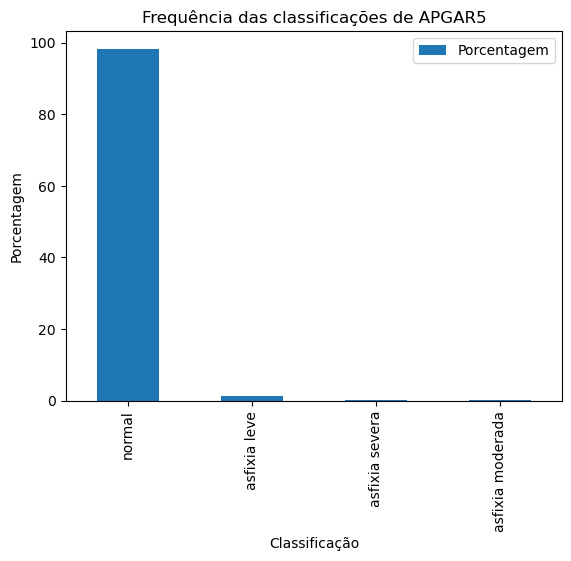

In [176]:
# 9) seu código aqui

ocorrencias = df['APGR5_CLASS'].value_counts()
total = df['APGR5_CLASS'].count()
porcentagem = ocorrencias/total *100

df_apgar = pd.DataFrame(porcentagem)

df_apgar.rename(columns={'APGR5_CLASS': 'Porcentagem'}, inplace=True)  # Renomear a coluna
df_apgar.plot(kind='bar', title='Frequência das classificações de APGAR5')
plt.xlabel('Classificação')
plt.ylabel('Porcentagem')
plt.show()


In [177]:
# 9. Renomeie as variáveis para que fiquem no snake case, ou seja, em letras minúsculas, com um underscore entre as palávras. 
# Dica: repare que se você não quiser criar um dataframe novo, você vai precisar usar a opção inplace = True.


df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()



,locnasc,idademae,estcivmae,escmae,qtdfilvivo,gestacao,gravidez,consultas,apgar5,apgr5_class
0,1,19,5.0,8 a 11 anos,0.0,37 a 41 semanas,Única,4,10.0,normal
1,1,29,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,9.0,normal
2,1,37,9.0,8 a 11 anos,2.0,37 a 41 semanas,Única,4,10.0,normal
3,1,30,5.0,12 anos ou mais,0.0,37 a 41 semanas,Única,3,10.0,normal
4,1,30,2.0,8 a 11 anos,1.0,37 a 41 semanas,Única,4,10.0,normal
